In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#设置seaborn的风格
sns.set(style="whitegrid",context="notebook")
#from pylab import *
#from matplotlib.font_manager import _rebuild
#_rebuild()
#myfont = matplotlib.font_manager.FontProperties(fname="PingFang.ttc")
#mpl.rcParams['axes.unicode_minus'] = False
#sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
#plt.rcParams['font.sans-serif'] = [u'Microsoft YaHei']
#plt.rcParams['font.sans-serif']=['PingFang']
plt.rc('font', family='MicrosoftYaHei', size=13)
#mpl.rcParams['font.sans-serif']=[u'Microsoft YaHei']
#mpl.rcParams['axes.unicode_minus'] = False
#from pylab import *

#plt.rcParams['font.sans-serif'] = ['MicrosoftYaHei'] # 指定默认字体
#plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
#plt.rcParams['font.sans-serif']=['SimHei']
#plt.rcParams['font.sans-serif'] = ['SimHei'] + plt.rcParams['font.sans-serif']
print(plt.rcParams['font.sans-serif'])
#plt.rcParams['font.family']=['SimHei']
print(plt.rcParams['font.family'])
#

idata = pd.read_csv("../../data/housing.data", sep = ' ')
print(idata.shape)
idata.columns = ["id", "crim", "zn", "indus", "chas", "nox", "room", "age", "dis", "rad", "tax", "ptratio", 
                    "black", "lstat", "medv"]
#data = data.dropna(axis=1)
#data.drop(['id'], axis=1)
data = idata.drop(['id'], axis=1).fillna(0)
data.head()

['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif']
['MicrosoftYaHei']
(505, 15)


,crim,zn,indus,chas,nox,room,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


In [39]:
#import matplotlib
#matplotlib.matplotlib_fname()
#import matplotlib  
#a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])  
#for i in a:  
#    print(i)  

# 数据可视化
探索性数据分析(Exploratory Data Analysis，EDA)：是机器学习模型训练之前的一个重要步骤，通过借助python第三方库pandas、seaborn来绘图，可以帮助我们分析和发现数据中的异常情况、数据的分布情况，以及特征将的相互关系。

由于屏幕大小关系，我们选择四个自变量和因变量进行分析，indus(房屋所在镇无零售业务区域所占比例)，nox(一氧化氮浓度，每千万分之一)，rm(每处寓所的平均房间数)，lstat(弱势群体人口所占比例)，medv(房屋平均价格，单位1000美元)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['MicrosoftYaHei'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


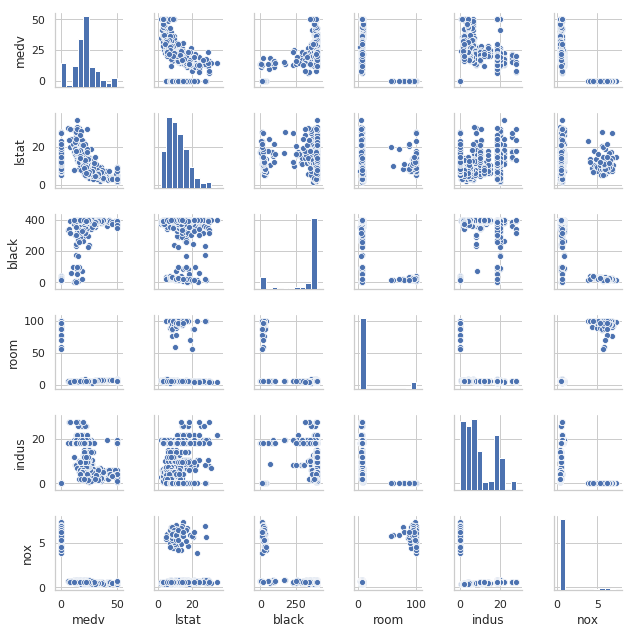

In [40]:
#sns.pairplot(data, size=1.5)
#cols = ["medv", "room"]
cols = ["medv", "lstat", "black", "room", "indus", "nox"]
sns.pairplot(data[cols], size=1.5)

# 系数矩阵
除了通过变量之间的散点图来寻找变量之间的关系，还可以通过变量之间的相关系数来发现变量的关系。相关系数矩阵，常用的有皮尔逊相关系数
(Pearson product-moment correlation coefficient，Pearson)的方阵，通过它可以来衡量两个特征之间的线性关系。
皮尔逊相关系数的取值在[-1,1]范围内，如果r=1，表示两个变量呈正相关，r=0表示两个变量没有关系，r=-1表示两个变量呈负相关。其实，相关系数矩阵就是标准化的协方差矩阵。


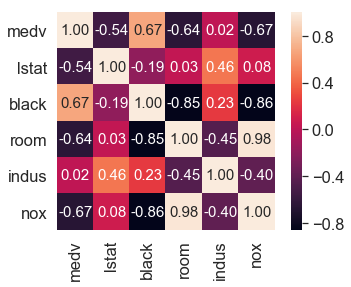

In [41]:
import numpy as np
cm = np.corrcoef(data[cols].values.T)
#设置字的比例
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True,
                 square=True,fmt=".2f",annot_kws={"size":15},yticklabels=cols,xticklabels=cols)

# 常用的线性回归算法
通过rm与medv数据之间的关系，来拟合一条直线。通过rm与medv的点集可以发现，在周围存在着很多的异常值，异常值对于线性回归模型具有很严重的影响。下面通过RANSAC算法，清除异常值。


(451, 1)


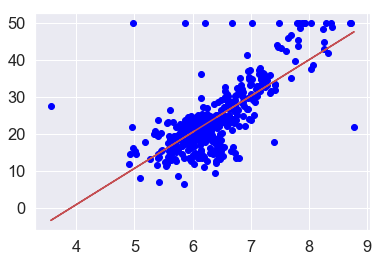

(505, 1)


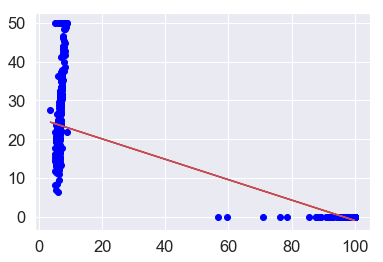

In [42]:
from sklearn.linear_model import LinearRegression
#data = data.drop(['id'], axis=1).fillna(0)
tdata = data[data["room"] < 40]
def draw_lr(X, Y):
    clf = LinearRegression()
    X = np.array(X).reshape(X.shape[0], 1)
    Y = np.array(Y).reshape(Y.shape[0], 1)
    print(X.shape)
    clf.fit(X, Y)
    pred_Y = clf.predict(X)
    plt.scatter(X, Y, c="blue")
    plt.plot(X, pred_Y, c='r')
    plt.show()
draw_lr(tdata.room, tdata.medv)
draw_lr(data.room, data.medv)

# RANSAC拟合高鲁棒性回归
RANSAC(Random Sample Consenus)，它是根据一组包含异常数据的样本数据集，计算出数据的数学模型参数，得到有效样本数据的算法。使用数据的一个子集(内点,Ran)来进行回归模型的拟合。

RANSAC算法的工作流程如下：

1、从数据集中随机抽取样本构建内点集合拟合模型。

2、使用剩余的数据对上一步得到的模型进行测试，并将落在预定公差范围内的样本点增加到内点集合中。

3、使用全部的内点集合数据再次进行模型的拟合。

4、使用内点集合来估计模型的误差。

5、如果模型性能达到了用户设定的特定阈值或者迭代的次数达到了预定的次数，则算法终止，否则重复从第一步开始。


(451, 1)


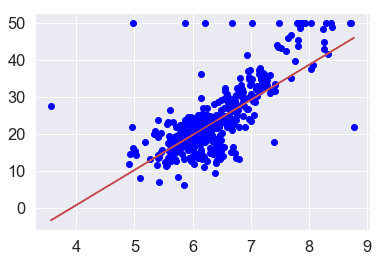

(505, 1)


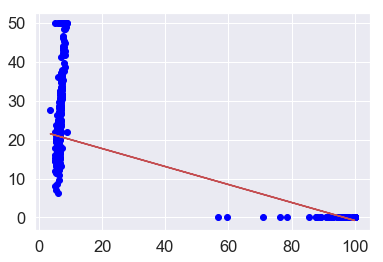

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/ransac.py:288: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/ransac.py:288: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


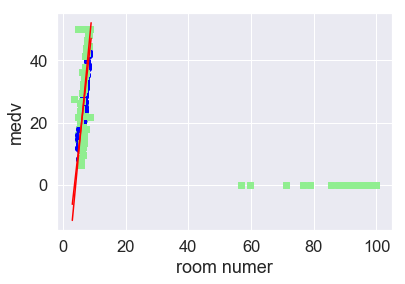

In [43]:
from sklearn.linear_model import RANSACRegressor
def draw_RAN(X, Y):
    clf = RANSACRegressor()
    X = np.array(X).reshape(X.shape[0], 1)
    Y = np.array(Y).reshape(Y.shape[0], 1)
    print(X.shape)
    clf.fit(X, Y)
    pred_Y = clf.predict(X)
    plt.scatter(X, Y, c="blue")
    plt.plot(X, pred_Y, c='r')
    plt.show()
def draw_RAN_A(X, Y):
    '''
    max_trials设置最大迭代次数为100
    min_samples随机抽取内点的最小样本数为50
    residual_metric计算拟合曲线与样本点的距离的绝对值
    residual_threshold设置预定公差，小于这个值才被加入到内点集合
    '''
    X = np.array(X).reshape(X.shape[0], 1)
    Y = np.array(Y).reshape(Y.shape[0], 1)
    ransac = RANSACRegressor(LinearRegression(),max_trials=100,min_samples=50,
                             residual_metric=lambda x:np.sum(np.abs(x),axis=1),
                             residual_threshold=5.0,random_state=0)
    ransac.fit(X,Y)
    inlier_mask = ransac.inlier_mask_
    outlier_mask = np.logical_not(inlier_mask)
    line_X = np.arange(3,10,1)
    line_y_ransac = ransac.predict(line_X[:,np.newaxis])
    plt.scatter(X[inlier_mask],Y[inlier_mask],c="blue",marker="o",label="内点")
    plt.scatter(X[outlier_mask],Y[outlier_mask],c="lightgreen",marker="s",label="异常值")
    plt.plot(line_X,line_y_ransac,color="red")
    plt.xlabel("room numer")
    plt.ylabel("medv")

draw_RAN(tdata.room, tdata.medv)
draw_RAN(data.room, data.medv)
draw_RAN_A(tdata.room, tdata.medv)
draw_RAN_A(data.room, data.medv)

## residual error

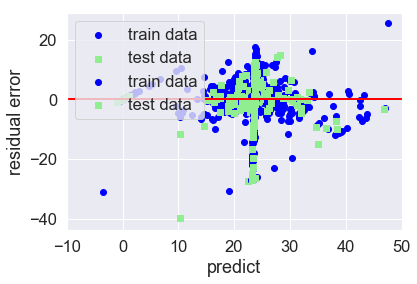

In [44]:
def residual_error(X, Y):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    # #创建一个线性模型对象
    X = np.array(X).reshape(X.shape[0], 1)
    Y = np.array(Y).reshape(Y.shape[0], 1)
    linear = LinearRegression()
    # #训练模型
    linear.fit(X,Y)
    #将数据集分为训练集和测试集
    train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2)
    train_y_pred = linear.predict(train_x)
    test_y_pred = linear.predict(test_x)
    plt.scatter(train_y_pred,train_y_pred-train_y,c="blue",marker="o",label="train data")
    plt.scatter(test_y_pred,test_y_pred-test_y,c="lightgreen",marker="s",label="test data")
    plt.legend(loc="upper left")
    plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color="red")
    plt.xlim([-10,50])
    plt.xlabel("predict")
    plt.ylabel("residual error")
residual_error(tdata.room, tdata.medv)
residual_error(data.room, data.medv)

## mean square error 和决定系数$R^2$
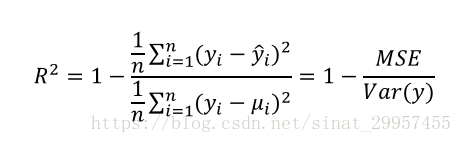


In [45]:
from sklearn.metrics import mean_squared_error,r2_score
def mean_square_error(X, Y):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    # #创建一个线性模型对象
    X = np.array(X).reshape(X.shape[0], 1)
    Y = np.array(Y).reshape(Y.shape[0], 1)
    linear = LinearRegression()
    # #训练模型
    linear.fit(X,Y)
    #将数据集分为训练集和测试集
    train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.2)
    train_y_pred = linear.predict(train_x)
    test_y_pred = linear.predict(test_x)
    print("train mse=%.3f" % (mean_squared_error(train_y, train_y_pred)))
    print("test mse=%.3f" % (mean_squared_error(test_y, test_y_pred)))
    print("train R^2=%.3f" % (r2_score(train_y, train_y_pred)))
    print("test R^2=%.3f" % (r2_score(test_y, test_y_pred)))    
    #plt.scatter(train_y_pred,train_y_pred-train_y,c="blue",marker="o",label="train data")
    #plt.scatter(test_y_pred,test_y_pred-test_y,c="lightgreen",marker="s",label="test data")
    #plt.legend(loc="upper left")
    #plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color="red")
    #plt.xlim([-10,50])
    #plt.xlabel("predict")
    #plt.ylabel("residual error")
mean_square_error(tdata.room, tdata.medv)
mean_square_error(data.room, data.medv)

train mse=32.273
test mse=46.147
train R^2=0.587
test R^2=0.387
train mse=72.630
test mse=69.842
train R^2=0.410
test R^2=0.424


# 非线性回归

liner r^2=0.500
poly r^2=0.607
forest r^2=0.680


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


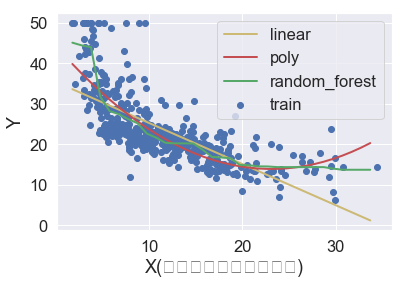

liner r^2=0.290
poly r^2=0.385
forest r^2=0.485


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


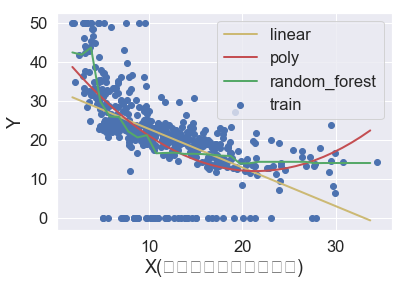

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
def poly_regression(X, Y):
    X = np.array(X).reshape(X.shape[0], 1)
    Y = np.array(Y).reshape(Y.shape[0], 1)
    linear = LinearRegression()
    linear.fit(X, Y)
    Y_linear = linear.predict(X)
    print("liner r^2=%.3f" % (r2_score(Y, Y_linear)))
    
    poly = PolynomialFeatures(degree=2)
    poly_clf = LinearRegression()
    X_poly = poly.fit_transform(X)
    poly_clf.fit(X_poly, Y)
    Y_poly = poly_clf.predict(X_poly)
    
    # random forest
    '''
    n_estimators:估计器(树)的个数
    criterion:优化目标
    '''
    X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3)
    forest_clf = RandomForestRegressor(n_estimators=100, max_depth=3, criterion="mse", n_jobs=1)
    forest_clf.fit(X_train, Y_train)
    print("poly r^2=%.3f" % (r2_score(Y, Y_poly)))
    print("forest r^2=%.3f" % (r2_score(Y, forest_clf.predict(X))))
    plt.scatter(X, Y, label="train", marker="o", color="b")
    X_trans = np.arange(np.min(X),np.max(X),1)[:,np.newaxis]
    plt.plot(X_trans, linear.predict(X_trans), label="linear", color="y", lw=2,linestyle="-")
    plt.plot(X_trans, poly_clf.predict(poly.fit_transform(X_trans)), label="poly", color="r", lw=2,linestyle="-")
    plt.plot(X_trans, forest_clf.predict(X_trans), label="random_forest", color="g", lw=2,linestyle="-")
    plt.xlabel("X(弱势群体人口所占比例)")
    plt.ylabel("Y")
    plt.legend(loc="upper right")
    plt.show()
#
poly_regression(tdata.lstat, tdata.medv)
poly_regression(data.lstat, data.medv)  